# Linear Regression (continued)

In a [previous report](https://github.com/marty-vanhoof/Maching_Learning/blob/master/Linear_Regression/Linear_Regression.ipynb), we went into some detail about linear regression and the batch gradient descent algorithm.  We also worked through an example in the case of simple linear regression where we had 1 feature and we were trying to fit a line to the data.  Now we will consider multiple linear regression where we have at least 2 features, which means we are trying to fit a hyperplane to the data in higher dimensions.  

A picture for the case of 2 features is shown below 

<img src="least_squares_plane.png">
<br/>

...

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filepath = os.getcwd() + '/ex1data2.txt'
df = pd.read_csv(filepath, names = ['size', 'bedrooms', 'price'])
df.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
# column means and standard deviations
print( 'column means: \n', df.mean().to_string() )
print()
print( 'column standard deviations: \n', df.std().to_string() )

column means: 
 size          2000.680851
bedrooms         3.170213
price       340412.659574

column standard deviations: 
 size           794.702354
bedrooms         0.760982
price       125039.899586


In [4]:
# standardize each column
df = ( df - df.mean() ) / df.std()
df.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [5]:
# insert column of ones
df.insert(0, 'ones', 1)

# get the training data X, target variable y, and intialize theta to (0,0,0)
X = df[['ones', 'size', 'bedrooms']]
y = df['price']
theta = np.array([0,0,0])

# transform X, y, theta into numpy matrices
X, y, theta = np.matrix(X), np.matrix(y).T, np.matrix(theta)

In [6]:
from lin_reg_scripts import compute_cost, gradient_descent

# run gradient_descent with the parameters below
alpha = 0.01
num_iterations = 1500
theta_fit, cost_hist = gradient_descent(X, y, theta, alpha, num_iterations)
print('theta_fit = ', theta_fit)
print()
print('J(theta_fit) = ', cost_hist[1499])

theta_fit =  [[ -1.10913882e-16   8.84042349e-01  -5.24551809e-02]]

J(theta_fit) =  0.130686706061


### Finding a Good Learning Rate

Remember that the objective of the gradient descent algorithm is to minimize the cost function $J(\theta)$. The learning rate $\alpha$ controls how fast the algorithm converges.  For a smaller $\alpha$, the algorithm takes longer to converge to the optimal value of $J(\theta)$.  If $\alpha$ is too large, $J(\theta)$ can get very large and diverge.  Let's look at some plots to see how $J(\theta)$ changes according to the number of iterations and for several different values of $\alpha$.

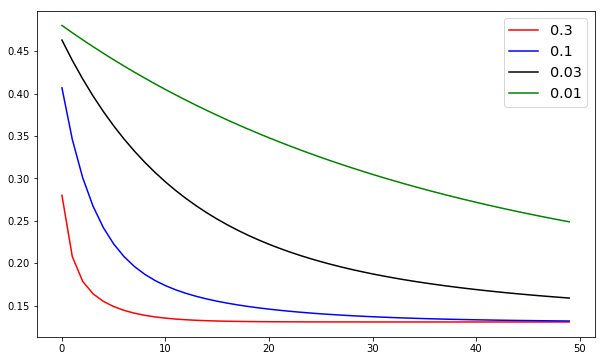

In [135]:
from collections import defaultdict

def cost_hist(alpha_vals, num_iterations):
    '''Make a dictionary of cost histories for different values
    of the learning rate alpha.  Each dict key is an alpha value
    and each dict value is a list consisting of the values of the
    cost function for each iteration of gradient_descent()'''
    
    hist_dict = defaultdict()
    for alph in alpha_vals:
        hist = gradient_descent(X, y, theta, alph, num_iterations)[1]
        hist_dict[alph] = hist
    
    return hist_dict 

num_iter = 50
# alpha values and colours for the plot
a_vals = [0.3, 0.1, 0.03, 0.01]
colours = ['red', 'blue', 'black', 'green']
# all the cost histories to use for the plot
c_hist = cost_hist(a_vals, num_iter)

# make the plot
fig, ax = plt.subplots( figsize = (10,6) )
for alph, colour in zip(a_vals, colours):
    ax.plot( np.arange(num_iter), c_hist[alph], colour, label = alph )

ax.legend(fontsize = 'x-large')
plt.show()